In [24]:

from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [25]:
zoo= pd.read_csv("C:\\Users\\hp\\Downloads\\excelr_ds_files\\ASSIGN\\KNN\\Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [26]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [27]:
from IPython import get_ipython
from IPython.display import display
# %%

from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# %%
zoo= pd.read_csv("C:\\Users\\hp\\Downloads\\excelr_ds_files\\ASSIGN\\KNN\\Zoo.csv")

zoo.head()
# %%
zoo.columns
# %%
# Define the column names for the dataset
names = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']

# Assuming 'Zoo.csv' is in the current directory
filename = "C:\\Users\\hp\\Downloads\\excelr_ds_files\\ASSIGN\\KNN\\Zoo.csv" 

# Now read the CSV file with the specified column names
dataframe = pd.read_csv(filename, names=names)  # Using pd.read_csv since you already imported pandas as pd
array = dataframe.values
X = array[:, 1:8]
Y = array[:, 8]

In [28]:
num_folds = 10
kfold = KFold(n_splits=10)

In [29]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X, Y, cv=kfold)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 143, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 271, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 825, in kneighbors
    X = self._validate

In [30]:
print(results.mean())

nan


In [31]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
# Define the column names for the dataset
names = ['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']

# Assuming 'Zoo.csv' is in the current directory
filename = "C:\\Users\\hp\\Downloads\\excelr_ds_files\\ASSIGN\\KNN\\Zoo.csv" #Updated code

# Now read the CSV file with the specified column names
dataframe = pd.read_csv(filename, names=names)  # Using pd.read_csv since you already imported pandas as pd
array = dataframe.values
X = array[:, 1:8]
Y = array[:, 8]

In [33]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [34]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through the columns in X and encode string columns
for i in range(X.shape[1]):  # Iterate over columns
    if isinstance(X[0, i], str):  # Check if the column contains strings
        X[:, i] = label_encoder.fit_transform(X[:, i])  # Encode the column


n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)  # Now X should contain only numeric values

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [35]:
print(grid.best_score_)
print(grid.best_params_)

0.9019047619047619
{'n_neighbors': 14}


C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklea

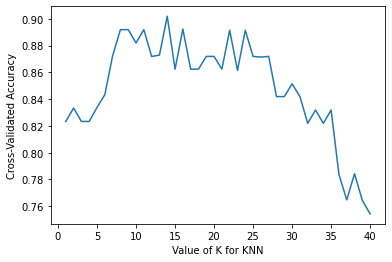

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()